# HK Model with Separable Landau Interaction

## 1. Setup 1D

In [1]:
import numpy as np
from scipy.optimize import root, minimize
import matplotlib.pyplot as plt

t = 1
d = 1

def I_1(vars):
    x, y = vars
    if np.abs(x / (2 * t * y)) < 1:
        return np.heaviside(x + 2 * t * y, 1) - np.arccos(x / (2 * t * y)) / np.pi
    else:
        return np.heaviside(x + 2 * t * y, 1)
    
def J_1(vars):
    x, y = vars
    if np.abs(x / (2 * t * y)) < 1:
        return - np.sqrt((2 * t * y)**2 - x**2) / np.pi
    else:
        return 0

# Only for U > 0!   
def GLS_1d(vars):
    rho, mu, U, e_tilde, f_0, f_1 = vars
    eq1 = rho - (I_1([mu - f_0 * rho, 1 + f_1 * e_tilde]) + I_1([mu - U - f_0 * rho, 1 + f_1 * e_tilde]))
    eq2 = e_tilde - (J_1([mu - f_0 * rho, 1 + f_1 * e_tilde]) + J_1([mu - U - f_0 * rho, 1 + f_1 * e_tilde]))
    return [eq1, eq2]

def solve_GLS_1d(rho, U, f_0, f_1, initial_guess):
    # def x = [mu, e_tilde]
    GLS_reduced = lambda x: GLS_1d([rho, x[0], U, x[1], f_0, f_1])
    sol = root(GLS_reduced, initial_guess, method='hybr')
    # Should return list [mu, e_tilde] for any given rho
    return sol.x

def make_solution_arrays(rho_array, U, f_0, f_1):
    mu_list = []
    e_tilde_list = []

    for rho_val in rho_array:
        if U <= 4 * t * d:
            # Model as one straight line through start and endpoint
            guess_rho = (U / 2 + 2) * rho_val - 2
        else:
            # Model as two different lines for each band
            if rho_val <= 1:
                guess_rho = 4 * rho_val - 2
            else:
                guess_rho = 4 * rho_val + U - 6

        a = 1

        if U <= 4 * t * d:
            # Model as a(x**2 - 2x)
            guess_e = a * (rho_val**2 - 2 * rho_val)
        else:
            # Model as two different parabolas for each band
            if rho_val <= 1:
                guess_e = a * (rho_val**2 - rho_val)
            else:
                guess_e = a * (rho_val**2 - 3 * rho_val + 2)


        guess = [guess_rho, guess_e]

        sol = solve_GLS_1d(rho_val, U, f_0, f_1, guess)
        mu_list.append(sol[0])
        e_tilde_list.append(sol[1])

    mu_array = np.array(mu_list)
    e_tilde_array = np.array(e_tilde_list)

    return mu_array, e_tilde_array

def minimize_GLS_norm_1d(rho, U, f_0, f_1, initial_guess):
    # def x = [mu, e_tilde]
    GLS_reduced = lambda x: GLS_1d([rho, x[0], U, x[1], f_0, f_1])
    GLS_reduced_norm = lambda x: GLS_reduced(x)[0]**2 + GLS_reduced(x)[1]**2

    sol = minimize(GLS_reduced_norm, initial_guess, method='L-BFGS-B')
    # Should return list [mu, e_tilde] for any given rho
    return sol.x

def make_solution_arrays_norm(rho_array, U, f_0, f_1):
    mu_list = []
    e_tilde_list = []

    for rho_val in rho_array:
        if U <= 4 * t * d:
            # Model as one straight line through start and endpoint
            guess_rho = (U / 2 + 2) * rho_val - 2
        else:
            # Model as two different lines for each band
            if rho_val <= 1:
                guess_rho = 4 * rho_val - 2
            else:
                guess_rho = 4 * rho_val + U - 6

        a = 1

        if U <= 4 * t * d:
            # Model as a(x**2 - 2x)
            guess_e = a * (rho_val**2 - 2 * rho_val)
        else:
            # Model as two different parabolas for each band
            if rho_val <= 1:
                guess_e = a * (rho_val**2 - rho_val)
            else:
                guess_e = a * (rho_val**2 - 3 * rho_val + 2)


        guess = [guess_rho, guess_e]

        sol = minimize_GLS_norm_1d(rho_val, U, f_0, f_1, guess)
        mu_list.append(sol[0])
        e_tilde_list.append(sol[1])

    mu_array = np.array(mu_list)
    e_tilde_array = np.array(e_tilde_list)

    return mu_array, e_tilde_array



def one_plot(x_array, y_array, x_label, y_label, title):
    plt.figure(dpi=100)
    # Plot erstellen
    plt.plot(x_array, y_array, linestyle='-')
    
    # Achsenbeschriftungen und Titel
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show() 



To do: 
1. Correct guesses using at least knowledge about f0 behaivour of mu, maybe think about how e scales
2. Compute Jacobian, even though annoying, try maybe other algorithms

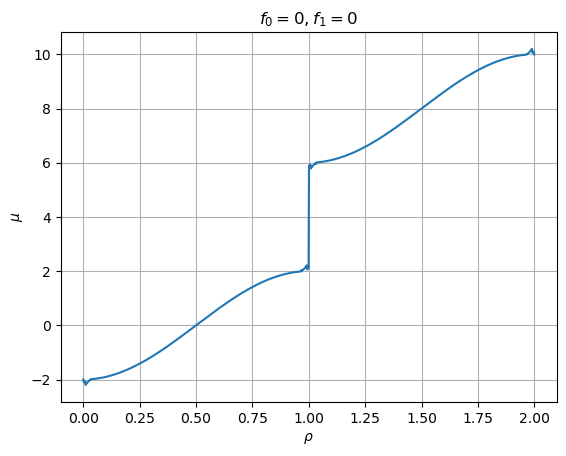

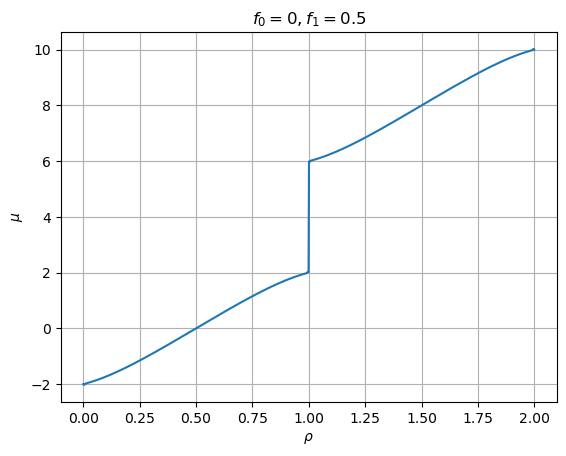

In [12]:
rho_array = np.linspace(0, 2, 1000)
mu_array_hk, e_tilde_array_hk = make_solution_arrays_norm(rho_array, 8, 0, 0)
one_plot(rho_array, mu_array_hk, r'$\rho$', r'$\mu$', r'$f_0 = 0, f_1=0$')
#one_plot(rho_array, e_tilde_array_hk, r'$\rho$', r'$\tilde{e}$', r'$f_0 = 0, f_1=0$')
mu_array_f1, e_tilde_array_f1 = make_solution_arrays_norm(rho_array, 8, 0, 0.5)
one_plot(rho_array, mu_array_f1, r'$\rho$', r'$\mu$', r'$f_0 = 0, f_1=0.5$')

### Compute and plot for many $U$

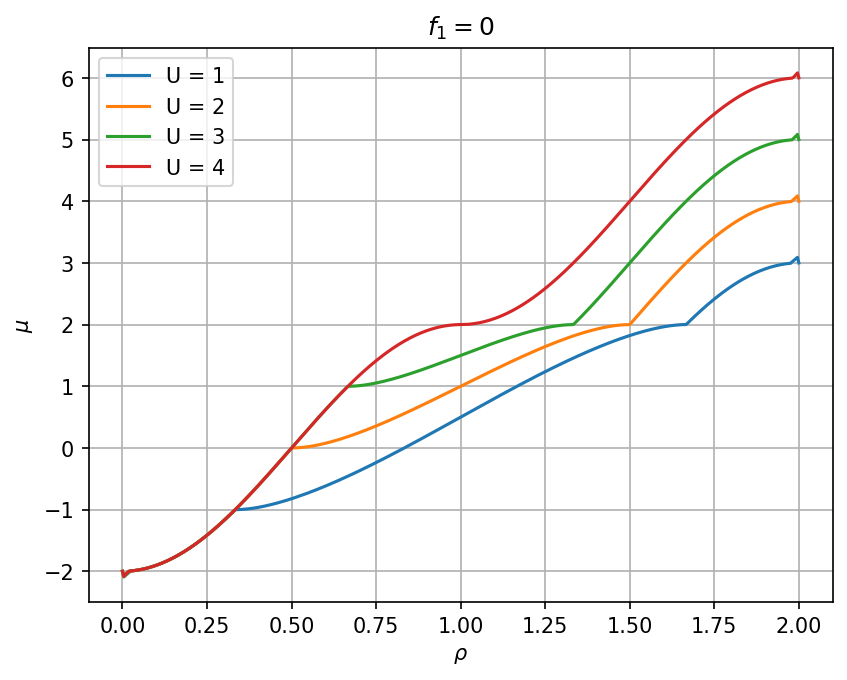

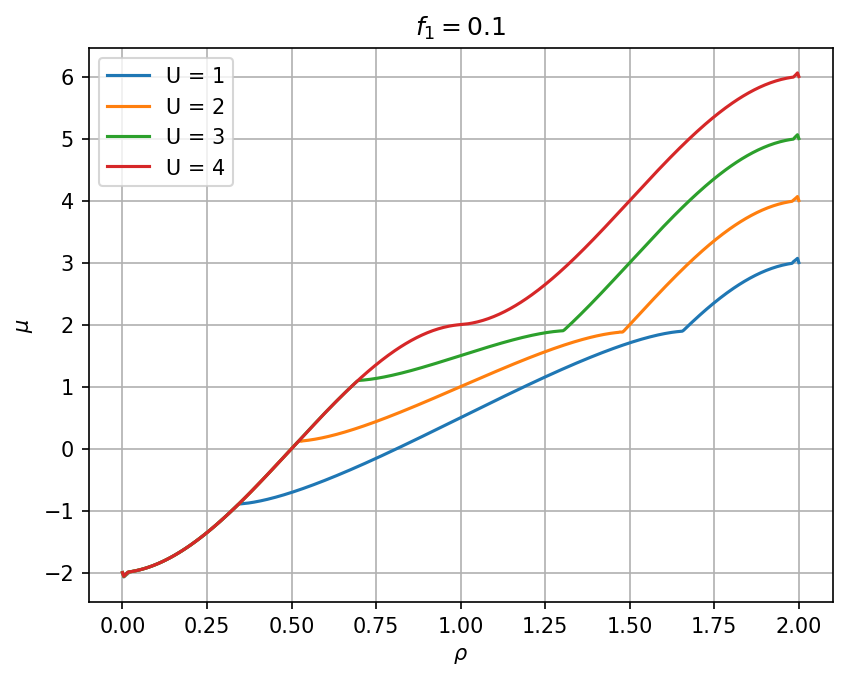

In [7]:
def many_plots(U_array, x_array, y_arrays, xlabel, ylabel, title):
    plt.figure(dpi=150)
    # Plot erstellen
    for i in range(len(U_array)):
        plt.plot(x_array, y_arrays[i], linestyle='-', label=f'U = {U_array[i]}')
    
    # Achsenbeschriftungen und Titel
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend(loc='best')
    plt.title(title)
    plt.show()

rho_array = np.linspace(0, 2, 500)

U_values = [1, 2, 3, 4]
mu_arrays_U_values_hk = []
mu_arrays_U_values_f1_05 = []

for U_val in U_values:
    mu_arr, e_arr = make_solution_arrays_norm(rho_array, U_val, 0, 0)
    mu_arrays_U_values_hk.append(mu_arr)

for U_val in U_values:
    mu_arr, e_arr = make_solution_arrays_norm(rho_array, U_val, 0, 0.1)
    mu_arrays_U_values_f1_05.append(mu_arr)

many_plots(U_values, rho_array, mu_arrays_U_values_hk, r'$\rho$', r'$\mu$', r'$f_1 = 0$')
many_plots(U_values, rho_array, mu_arrays_U_values_f1_05, r'$\rho$', r'$\mu$', r'$f_1 = 0.1$')

Idea: Dont take rho array as given, but mu array. compute rho(mu). As this should not have points where the derivative is near zero, newton-techniques will likely be more succesfull and we can get rid of kinks in numerical calculations. Try to findout if wrinkle for rho=1, U=4 is numerical error or actual physics, i.e. has $U_c(\rho = 1) = W$ shifted?

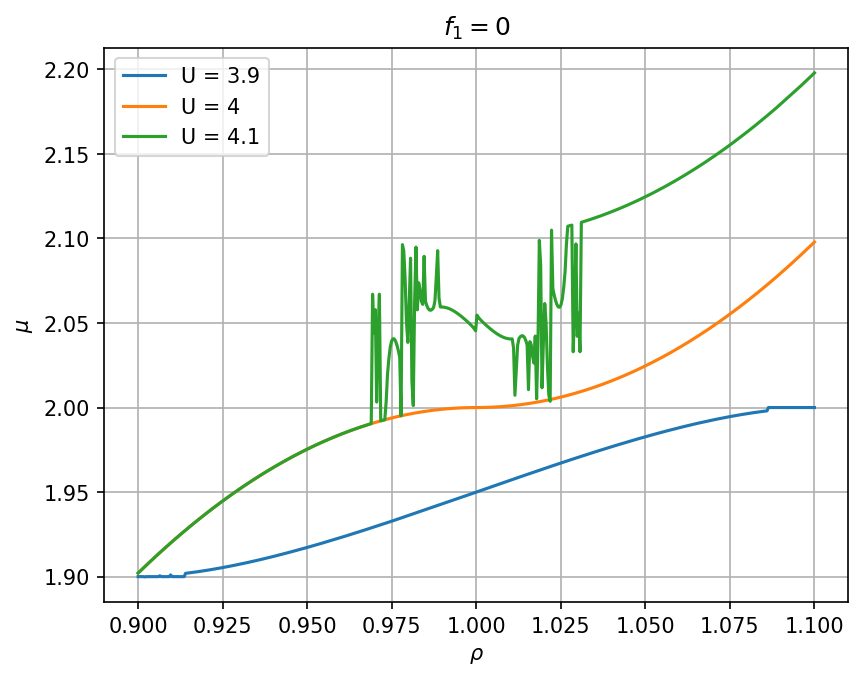

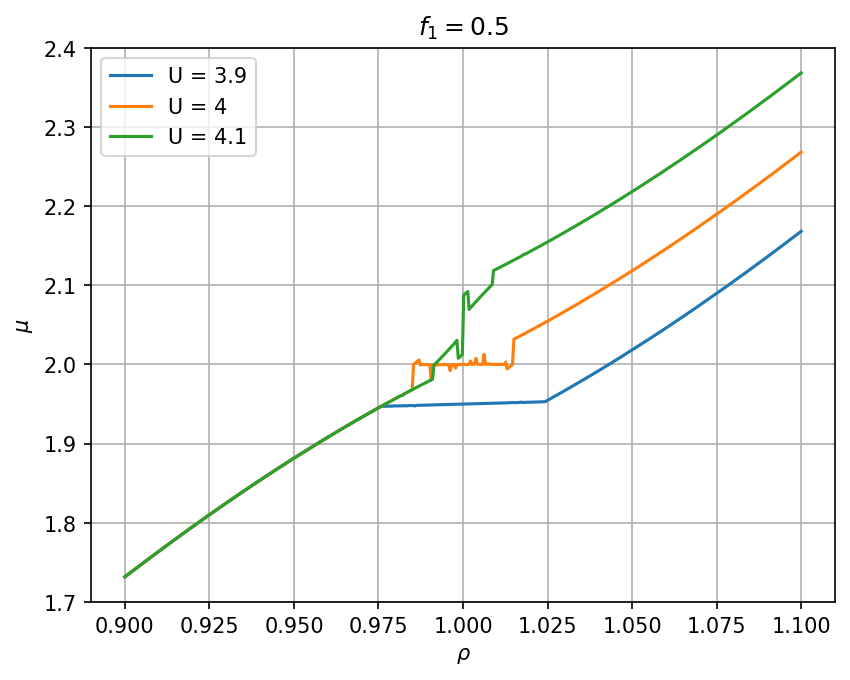

In [9]:
rho_array = np.linspace(0.9, 1.1, 500)
U_values = [3.9, 4, 4.1]
mu_arrays_U_values_hk = []
mu_arrays_U_values_f1_05 = []

for U_val in U_values:
    mu_arr, e_arr = make_solution_arrays_norm(rho_array, U_val, 0, 0)
    mu_arrays_U_values_hk.append(mu_arr)

for U_val in U_values:
    mu_arr, e_arr = make_solution_arrays_norm(rho_array, U_val, 0, 0.5)
    mu_arrays_U_values_f1_05.append(mu_arr)

many_plots(U_values, rho_array, mu_arrays_U_values_hk, r'$\rho$', r'$\mu$', r'$f_1 = 0$')
many_plots(U_values, rho_array, mu_arrays_U_values_f1_05, r'$\rho$', r'$\mu$', r'$f_1 = 0.5$')